### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

Find good (& reasonable) choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Check your NN model by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [1]:
#target parameters of f(x) = a*x^3 + b*x^2 + c*x + d
a = 3
b = -2
c = -3
d = 4

def f(x):
    return a * x**3 + b * x**2 + c * x + d

In [2]:
#genrate a set of input data 
import numpy as np
import tensorflow as tf

#generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = f(x_valid)  # ideal (target) function

sigma = 0.05 # noise standard deviation
y_train = np.random.normal(f(x_train), sigma)
y_valid = np.random.normal(f(x_valid), sigma)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-06-14 18:12:53.372160: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


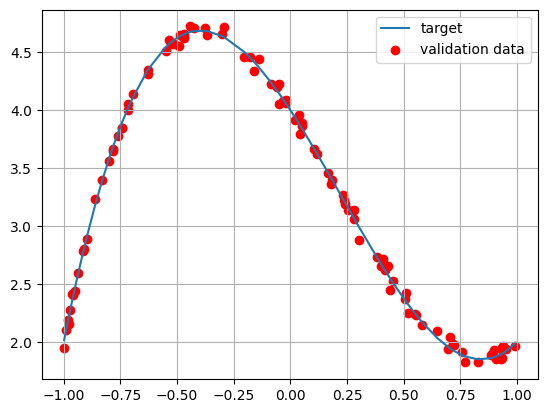

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
#compose th NN model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = Sequential()

model.add(Dense(35, input_shape=(1,), activation='relu'))  #Input layer
model.add(Dense(20, activation='relu')) 
model.add(Dense(30, activation='relu'))  
model.add(Dense(1))  # Output layer

#compile the model
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])


In [5]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 35)                70        
                                                                 
 dense_1 (Dense)             (None, 20)                720       
                                                                 
 dense_2 (Dense)             (None, 30)                630       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,451
Trainable params: 1,451
Non-trainable params: 0
_________________________________________________________________


In [6]:
# fit the model using training dataset
# over epochs of batch size each
# report training progress against validation data
bat_size = 10
Nepoc = 50
history = model.fit(x=x_train, y=y_train, 
          batch_size=bat_size, epochs=Nepoc,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
100/100 [==============================] - 2s 7ms/step - loss: 1.9352 - mse: 1.9352 - val_loss: 0.6153 - val_mse: 0.6153
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3014 - mse: 0.3014 - val_loss: 0.3780 - val_mse: 0.3780
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.1847 - mse: 0.1847 - val_loss: 0.2513 - val_mse: 0.2513
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1075 - mse: 0.1075 - val_loss: 0.1494 - val_mse: 0.1494
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0642 - mse: 0.0642 - val_loss: 0.0917 - val_mse: 0.0917
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0420 - mse: 0.0420 - val_loss: 0.0669 - val_mse: 0.0669
Epoch 7/50
100/100 [==============================] - 0s 1ms/step - loss: 0.0298 - mse: 0.0298 - val_loss: 0.0414 - val_mse: 0.0414
Epoch 8/50
100/100 [==============================] - 0s 2ms/step - loss: 0.

In [7]:
# return weights and biases
#model.get_weights()

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=bat_size, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 [==============================] - 0s 1ms/step - loss: 0.0041 - mse: 0.0041

Test loss: 0.004051125142723322
Test accuracy: 0.004051125142723322


In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=bat_size, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10/10 [==============================] - 0s 1ms/step - loss: 0.0016 - mse: 0.0016

Test loss: 0.001635570079088211
Test accuracy: 0.0016355701955035329


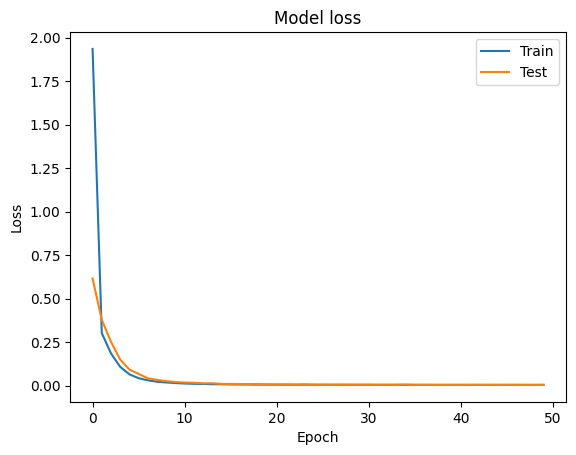

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Si verifica che la curva loss relativa al Test si trova, inizialmente, sopra quella di Train per poi andare a convergere al crescere del numero di epoche (come atteso). 

4/4 [==============================] - 0s 1ms/step


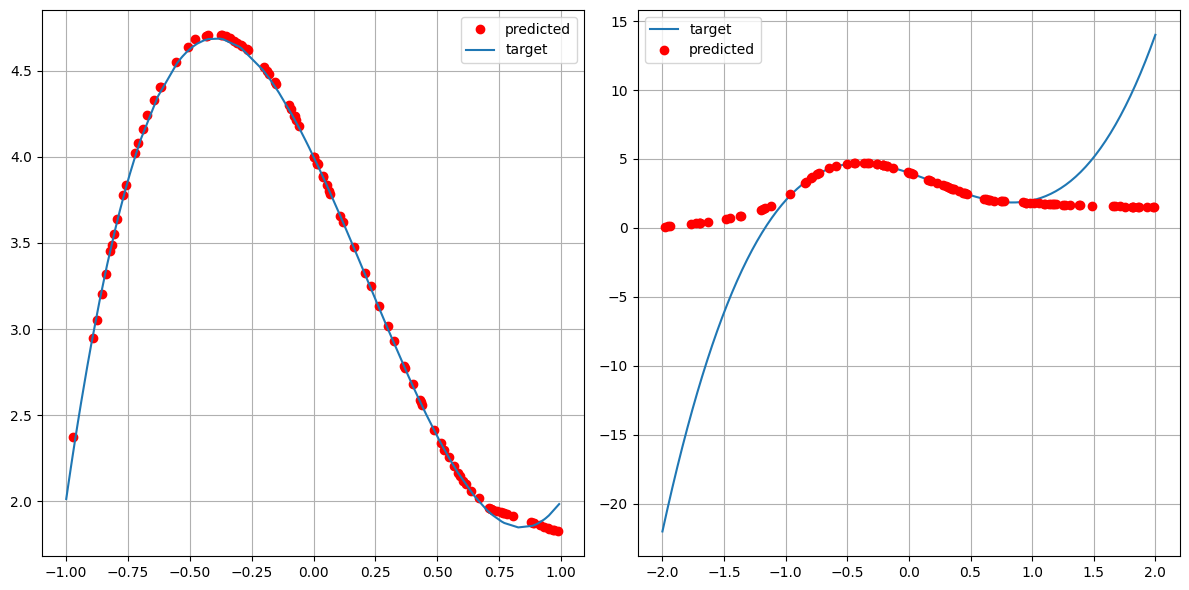

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_predicted, y_predicted, linestyle='none', marker='o', color='r', label='predicted')
plt.plot(x_valid, y_target, label='target')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
x = np.linspace(-2, 2, 100)
x_predicted_out = np.random.uniform(-2, 2, 100)
y_predicted_out = model.predict(x_predicted_out)
plt.plot(x, f(x), label='target')
plt.plot(x_predicted_out, y_predicted_out, linestyle='none', marker='o', color='r', label='predicted')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

COMMENTI

La configurazione presentata è quella ritenuta migliore: in questa configurazione, le predizioni del modello (entro gli estremi di training) sono buone.
Le altre configurazioni osservate sono state:  

  - 1 solo layer nascosto (invece di 2);

  - un numero diverso di neuroni: in generale, si è verificato che aumentando il numero di neuroni non necessariamente il risultato migliora;

  - un numero decrescente di neuroni nei layers;

  - altre funzioni di attivazione: softmax e tanh (provando diverse combinazioni con i vari layers);

  - diversi tipi di ottimizzazione: rmsprop e adam;

  - un diverso tipo di loss (mae).

Si verifica che, fuori dal range di training, le predizioni sono errate.